# Feature Engineering
3 general approaches   
   1. Extracting information   
   Example: 1989-11-05 08:33:54   
   Extract: year: 1989, month:11, day:05, hour min sec
   
   
   2. Combining information    
   Example: combine weekend and evening time and define it as 'Nightlife'.
   
   
   3. Transforming information    
   generally for categorical data.   
     
    a. integer encoding   
     USA-1, MEX-2, CHN-3   etc   
     but machine can think it as ordinal i.e MEX is two times USA (which is absurd)  
     ordinal example can be: Spice level                 
         _Mild:1, Hot:2, Fire:3_     
         this cannot be absurd, correctly ordinal.   
     i.e Fire is 3 times Mild.
     
     
     b. one-hot encoding (Dummy variables)   
     Example is
 | Country |   
     | --- |  
     | USA |
     | CHN |
     | USA |
     | MEX |   
     
     Into
     
   | USA | CHN | MEX |
        | --- | --- | --- |
        | 1 | 0 | 0 |
        | 0 | 1 | 0 |
        | 1 | 0 | 0 |
        | 0 | 0 | 1 |

..Dummy variable traps.

## Dealing with outliers

We need domain knowledge to consider which points lie in outlier zone.   
Use Quartile range??   
Normal Distribution??   
??

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Generating Data

In [2]:
# creating a sampleof ages around a mean, std, no.of samples
def create_age(mu=50,sigma=13, num_sample=100, seed=42):
    
    np.random.seed(seed)
    
    sample_ages = np.random.normal(loc=mu, scale=sigma, size=num_sample)
    sample_ages = np.round(sample_ages,0)
    
    return sample_ages
    

In [3]:
sample = create_age()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

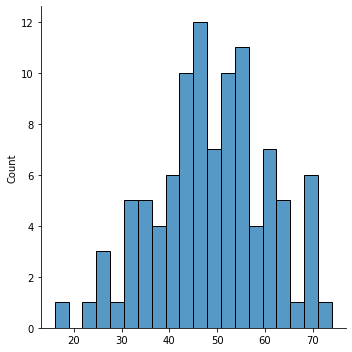

In [4]:
sns.displot(sample, bins=20)

<AxesSubplot:>

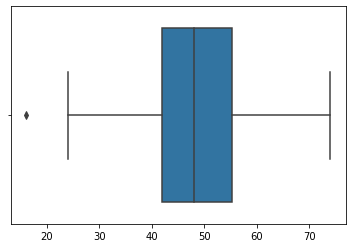

In [5]:
sns.boxplot(x=sample)

If we want grab that outlier (Left dot in above picture). We can use..   

In [6]:
ser = pd.Series(sample)
ser.head()

0    56.0
1    48.0
2    58.0
3    70.0
4    47.0
dtype: float64

In [7]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [8]:
IQR = 55.25 - 42.00  #Inter-quartile range (75%-25%)
lower_limit = 42.00 - 1.5*IQR

In [9]:
lower_limit

22.125

In [10]:
#series with removing outliers
ser[ser > lower_limit]    

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [11]:
# numpy can give percentile value directly
np.percentile(sample,[25,75])

array([42.  , 55.25])

In [12]:
#tuple packing
q25,q75 = np.percentile(sample,[25,75])

In [13]:
IQR = q75 - q25
IQR

13.25

In [14]:
## Now we use Ames Housing data to work upon
df = pd.read_csv('Ames_Housing_Data.csv')

In [15]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [16]:
#sale price is main label. Want prediction for sale price depending on other features.
#deal with outliers.

In [17]:
#Let us see correlation
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

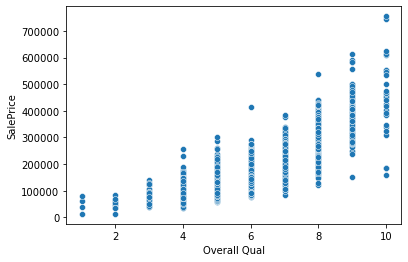

In [18]:
# overall Qual is higly positivwly correlated with SalePrice
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

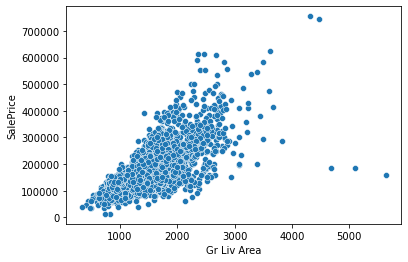

In [19]:
# qualtity 9,10 and low saleprice 3points look outliers. Let's check with other parameter
sns.scatterplot(x='Gr Liv Area', y='SalePrice',data=df)

In [20]:
# those 3points, are they at right bottom??
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [21]:
#we got 4 points
#Bottom right 3points are not following the trend. High Quality but SalePrice is low.   
#we need domain knowledge to discern

In [22]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<300000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [23]:
#dropping the outliers using the indices
drop_ind = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<300000)].index
drop_ind

Int64Index([1498, 2180, 2181], dtype='int64')

In [24]:
df = df.drop(index=drop_ind,axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

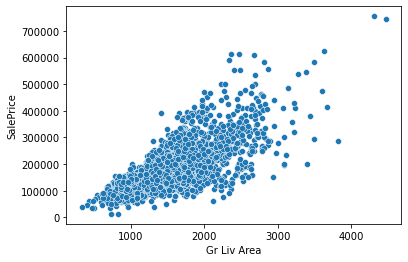

In [25]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice',data=df) #they're dropped

Example, where those 3points may not be outliers.   
Say, those 3points are recent data -- depicts changing scenario   
like, during financial crisis, large houses were selling at lower prices.   

**Need Domain Knowledge. Important!**

In [26]:
#storing this data
df.to_csv('Ames_outliers_removed.csv')

## Evaluating of the missing Data

It is good if we have description of the data, which we use.

In [100]:
#with open('Ames_Housing_Feature_Description.txt','r') as f:
#    print(f.read())

In [28]:
# we use
df1 = pd.read_csv('Ames_outliers_removed.csv')

In [29]:
#df1.info()

In [30]:
df1.head()

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [31]:
#PID (unique ID)is of no use, we can drop it.
df1 = df1.drop('PID', axis=1)

In [32]:
len(df1.columns)

81

In [33]:
df1.isnull().sum()

Unnamed: 0          0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [34]:
#in percentages
100 * df1.isnull().sum() / len(df1)

Unnamed: 0         0.00000
MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 81, dtype: float64

In [35]:
def percent_missing(df):
    percent_nan = 100 * df1.isnull().sum() / len(df1)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [36]:
percent_nan = percent_missing(df1)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

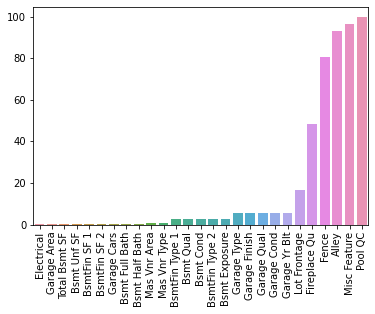

In [37]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Filling data in the rows where missing percentage is low

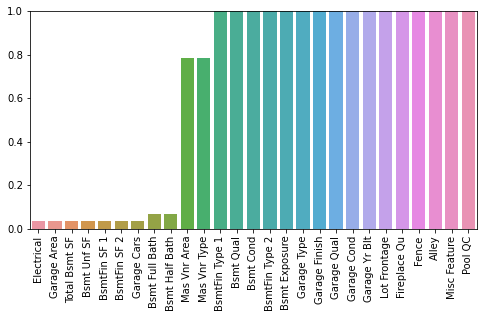

In [38]:
plt.figure(figsize=(8,4));
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1);


In [39]:
# need domain knowledge how to drop
# here, Electrical, Garage Area etc are so low we can drop those rows

In [40]:
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [41]:
100/len(df1)

0.0341646737273659

i.e 1 row is missing in those columns with .034 value   
The data missing might not belong to single row or house.

In [42]:
df1[df1['Electrical'].isnull()]

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [43]:
df1[df1['Garage Area'].isnull()]

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2233,2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


even though 1 value is missing in Electrical and Garage Area, they don't belong to same row.

dropping those rows, hopefully other missing data rows are removed simultaneously

In [44]:
df1 = df1.dropna(axis=0, subset=['Electrical', 'Garage Area'])

In [45]:
percent_nan = percent_missing(df1)

In [46]:
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

In [47]:
df1[df1['Bsmt Unf SF'].isnull()]['Total Bsmt SF']

1341   NaN
Name: Total Bsmt SF, dtype: float64

from domain knowledge, basement SF(square footage) is 0   
basement quality, cond... is none   
If there is no data there   
Needed to use .txt file for the description.   

In [48]:
# bsmt numeric columns --> fillna 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df1[bsmt_num_cols] = df1[bsmt_num_cols].fillna(0)

#bsmt string columns --> fill 'none'
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df1[bsmt_str_cols] = df1[bsmt_str_cols].fillna('None')

In [49]:
df1[df1['Bsmt Unf SF'].isnull()]

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [50]:
percent_nan = percent_missing(df1)
percent_nan[percent_nan<1]

Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

In [51]:
df1['Mas Vnr Type'] = df1['Mas Vnr Type'].fillna('None')


In [52]:
df1['Mas Vnr Area'] = df1['Mas Vnr Area'].fillna(0)

In [53]:
percent_nan = percent_missing(df1)

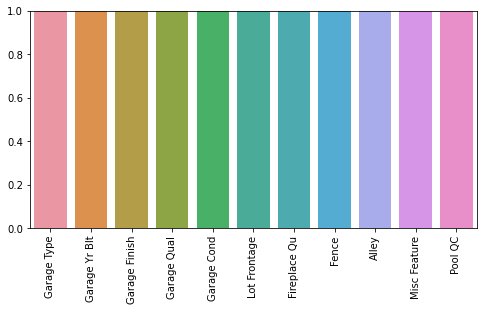

In [54]:
plt.figure(figsize=(8,4));
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1);

Now, every columns has more than 1 percent of data missing.   

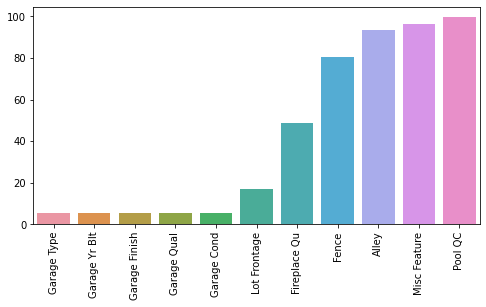

In [55]:
plt.figure(figsize=(8,4));
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);


If we have 99% missing data, its good todrop those columns.   
There can be a case where those dropped features are important, which we came to know later.   
Then we can't change the model.  
These cases may happen rarely. Those drop those columns.

For the case of features with 5-10% missing data, we need to fill appropriately.   
filling is making up data, do it reasonably.   

For easy cases, Nan, null can be zero.  
For harder cases, need human intuition, Domain knowledge, Statiscal methods(mean, median, mode etc) to fill.   

In [56]:
# Here, about the garage. If garage is not present, all abt garage are null or empty.
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

In [57]:
df1[gar_str_cols] = df1[gar_str_cols].fillna('None')

In [58]:
percent_nan = percent_missing(df1)

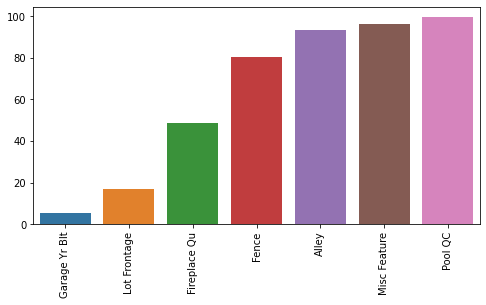

In [59]:
plt.figure(figsize=(8,4));
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [60]:
# garage year null values filled as 0. Years are generally in 1950s++. Didn't understang logic properly.
# 0 is way too away from mean so used 0 inplace of null.???
df1['Garage Yr Blt'] = df1['Garage Yr Blt'].fillna(0)

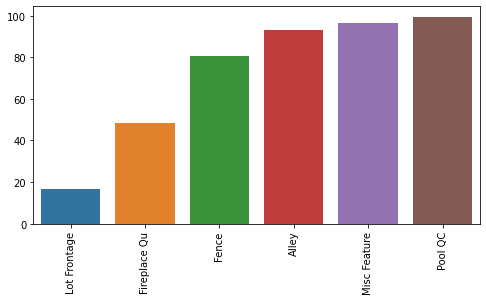

In [61]:
percent_nan = percent_missing(df1)

plt.figure(figsize=(8,4));
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [62]:
# few columns left
#here drop Fence,alley, Misc Feature, Pool Qc - too much data missing
df1 = df1.drop(['Fence','Alley','Misc Feature','Pool QC'],axis=1)

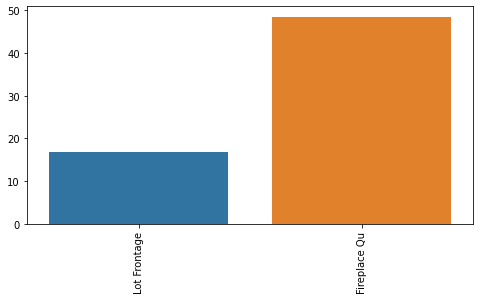

In [63]:
percent_nan = percent_missing(df1)

plt.figure(figsize=(8,4));
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [64]:
# now two features to left to solve
# Need domain expert here - tricky- can't drop cols as they're not so empty - can't drop empty rows as they are many 
df1['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [65]:
#Fireplace quality - filled None if it isn't there
df1['Fireplace Qu'] = df1['Fireplace Qu'].fillna("None")

In [66]:
# Lot frontage is numeric
df1['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

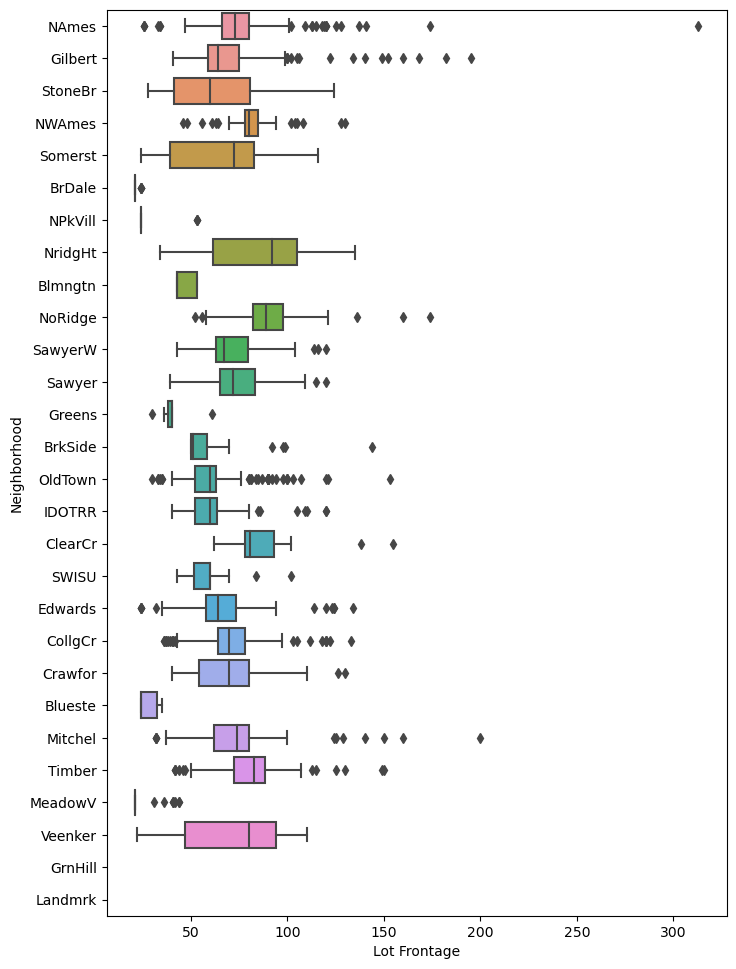

In [67]:
# Neighborhood: Physical locations within Ames city limits
# LotFrontage: Linear feet of street connected to property
# these two are dependent as said by instructor (I am not aware of this) -- Need domain knwldge
plt.figure(figsize=(8,12),dpi=100)
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df1,orient='h')

In [68]:
#min 16:22

In [69]:
df1.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [ ]:
#If a neighborhood misses a particular Lot frontage in the row. 
#Use the mean of that neighborhood and put in missing Lot Frontage.
# we do by .transform()

In [72]:
df1.groupby('Neighborhood')['Lot Frontage'].transform(lambda value:value.fillna(value.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [74]:
#There are some missing values in Lot Frontage (grouped by Neighborhood), 
#use the mean of Lot Frontage of that group and fill it.
df1['Lot Frontage'] = df1.groupby('Neighborhood')['Lot Frontage'].transform(lambda value:value.fillna(value.mean()))

In [75]:
df1.isnull().sum()

Unnamed: 0        0
MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 77, dtype: int64

In [76]:
# 3 missing values because there are NAN when grouped, can't find mean.
#remove those rows or put as zeroes -- Need Domain Knwldge
df1['Lot Frontage'] = df1['Lot Frontage'].fillna(0)

In [77]:
df1.isnull().sum()

Unnamed: 0        0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 77, dtype: int64

In [79]:
#percent_nan = percent_missing(df1)

#plt.figure(figsize=(8,4));
#sns.barplot(x=percent_nan.index,y=percent_nan)
#plt.xticks(rotation=90);

#ValueError: min() arg is an empty sequence -- no missing data

In [80]:
#storing as csv
df1.to_csv('Ames_NO_missing_data.csv')

## Dealing with categorical data
one hot encoding   
integer encoding

we have ordinal data like -- Overall Qual where 10 is better than 9,  better than 8-- a ranking.

BUT for example: MSSubClass (is not ordinal), the numbers are not ranking.

In [84]:
#MS Subclass is numeric, converting into str
df1['MS SubClass'] = df1['MS SubClass'].apply(str)

----

### Example

In [85]:
direction = pd.Series(['Up','Up','Down'])
direction

0      Up
1      Up
2    Down
dtype: object

In [86]:
pd.get_dummies(direction) #we get a column which is redundat, (n-1)columns are sufficient

,Down,Up
0,0,1
1,0,1
2,1,0


In [87]:
pd.get_dummies(direction, drop_first=True)

,Up
0,1
1,1
2,0


-----

In [88]:
# to get columns which are datatype=object
df1.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2923,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2924,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2925,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [90]:
#df1.info()

In [93]:
my_object_df = df1.select_dtypes(include='object')
my_object_df.head()

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


In [94]:
my_numeric_df = df1.select_dtypes(exclude='object')
my_numeric_df.head()

,Unnamed: 0,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
1,1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
2,2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900


In [95]:
df_objects_dummies = pd.get_dummies(my_object_df,drop_first=True)

In [96]:
df_objects_dummies.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [97]:

final_df = pd.concat([my_numeric_df,df_objects_dummies], axis=1)

In [98]:
final_df.head()

,Unnamed: 0,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
2,2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0


final_df is after concatenating the numerical columns and object encoding  -- this is used for further analysis    
i.e. finding $\beta$ of the features.   
they have 275 columns -- in reality we will remove lot of features which don't have significant $\beta$ coeff   
and with multicollinear features.

<h3> Summary </h3>

Feature Engineering   
3 general approaches:
<ol>
  <li>Extracting information</li>
  <li>Combining information</li>
  <li>Transforming  information</li>
</ol>


**Steps**
<ol>
  <li>Read Data</li>
  <li>Identify y variable</li>
  <li>Correlation</li>
  <li>Look for outliers, remove them</li>
  <li>Missing data - >90%, <10%, in between </li>
  <li>Missing data (>90%) - remove the columns</li>
    <li>Missing data - <10%, remove the empty rows or fill </li>
        <li>Missing data - in between, fill appropriately </li>
    <li>Handle cateforical as well woth dummy variables encoding</li>
    <li>Domain Knowledge very important to handle missing values</li>
    
</ol>

------------